In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# June 2024
# License: MIT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=500, n_classes=3, n_clusters_per_class=1, 
                           n_features=2, n_informative=2, n_redundant=0, class_sep=0.8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [4]:
print(f'Train accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {clf.score(X_test, y_test):.4f}')

Train accuracy: 1.0000
Test accuracy: 0.9440


In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(classifier, X, y, feature_names, class_labels, ax=None, legend='auto'):
    """Plot the decision boundaries of a classifier along with the dataset points.

    Parameters:
    - classifier: The trained classifier.
    - X: Feature dataset.
    - y: Target labels.
    - feature_names: List of feature names for labeling the axes.
    - class_labels: List of class labels for coloring the points.
    - ax: Matplotlib Axes object where the plot is drawn. If None, uses current axis.
    - legend: Controls the drawing of the legend. Use False to disable the legend.
    """
    if ax is None:
        ax = plt.gca()
        
    # Define colors and markers
    colors = ['red', 'cyan', 'blue']
    markers = ['s', 'o', '^']
    cmap = ListedColormap(colors[:len(class_labels)])
      
    # Setup mesh grid parameters
    resolution = 250  # Number of sample points in each axis
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1     
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), 
                         np.linspace(y_min, y_max, resolution))
    
    # Classify each point in the mesh grid
    z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape) 
    
    # Generate contour plot
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.4)  
       
    # Plot the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_labels[y], style=class_labels[y], 
                    hue_order=class_labels, style_order=class_labels,
                    palette=colors, markers=markers, edgecolor='k', ax=ax, legend=legend)

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])    

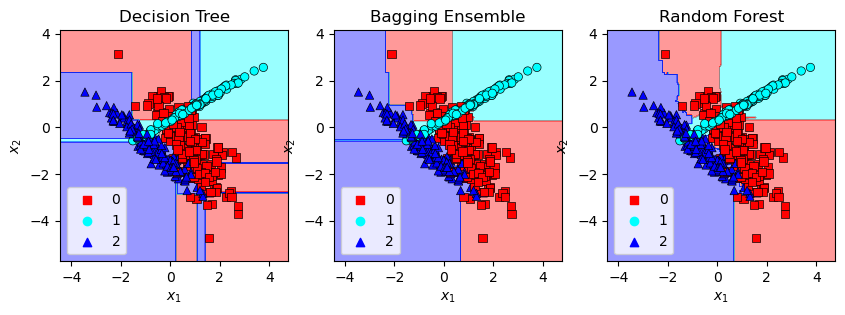

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

feature_names = ['$x_1$', '$x_2$']
class_labels = np.array(['0', '1', '2'])
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
plot_decision_boundaries(dt_clf, X, y, feature_names, class_labels, ax=axes[0])
axes[0].set_title('Decision Tree')
bag_clf = BaggingClassifier(random_state=42)
bag_clf.fit(X_train, y_train)
plot_decision_boundaries(bag_clf, X, y, feature_names, class_labels, ax=axes[1])
axes[1].set_title('Bagging Ensemble')
plot_decision_boundaries(clf, X, y, feature_names, class_labels, ax=axes[2])
axes[2].set_title('Random Forest')

plt.savefig('figures/random_forest_decision_boundaries.pdf', bbox_inches='tight')